In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Carga fichero csv.
df = pd.read_csv("/home/dsc/Data/us_dot/otp/On_Time_On_Time_Performance_2015_1.csv", sep=',')

/usr/lib64/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
17392,2015,1,1,4,7,2015-01-04,AA,19805,AA,N3CSAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285611,2015,1,1,7,3,2015-01-07,OO,20304,OO,N986CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414561,2015,1,1,13,2,2015-01-13,EV,20366,EV,N758EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300476,2015,1,1,23,5,2015-01-23,UA,19977,UA,N27205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390768,2015,1,1,1,4,2015-01-01,EV,20366,EV,N15986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(df)
df.columns

Index([u'Year', u'Quarter', u'Month', u'DayofMonth', u'DayOfWeek',
       u'FlightDate', u'UniqueCarrier', u'AirlineID', u'Carrier', u'TailNum', 
       ...
       u'Div4TailNum', u'Div5Airport', u'Div5AirportID', u'Div5AirportSeqID',
       u'Div5WheelsOn', u'Div5TotalGTime', u'Div5LongestGTime',
       u'Div5WheelsOff', u'Div5TailNum', u'Unnamed: 109'],
      dtype='object', length=110)

In [6]:
# Saber cuantos elementos hay NaN por columna. Eltos. no NaN
df.count()

Year                  469968
Quarter               469968
Month                 469968
DayofMonth            469968
DayOfWeek             469968
FlightDate            469968
UniqueCarrier         469968
AirlineID             469968
Carrier               469968
TailNum               467186
FlightNum             469968
OriginAirportID       469968
OriginAirportSeqID    469968
OriginCityMarketID    469968
Origin                469968
OriginCityName        469968
OriginState           469968
OriginStateFips       469968
OriginStateName       469968
OriginWac             469968
DestAirportID         469968
DestAirportSeqID      469968
DestCityMarketID      469968
Dest                  469968
DestCityName          469968
DestState             469968
DestStateFips         469968
DestStateName         469968
DestWac               469968
CRSDepTime            469968
                       ...  
Div2WheelsOn              27
Div2TotalGTime            27
Div2LongestGTime          27
Div2WheelsOff 

<function matplotlib.pyplot.show>

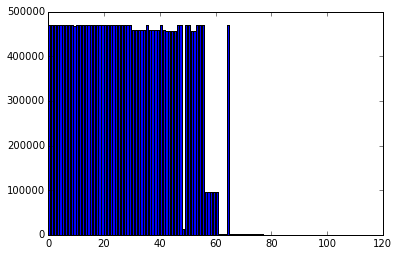

In [7]:
# Gráfico para ver lo de arriba.
# Vemos que hay muchas cols sin valores.
locx = range(len(df.columns))
plt.bar(locx, df.count())
plt.show

In [8]:
# Eliminamos dichas cols NaN.
columncount = df.count()

In [9]:
goodColumnCount = columncount[columncount > 1000]

<function matplotlib.pyplot.show>

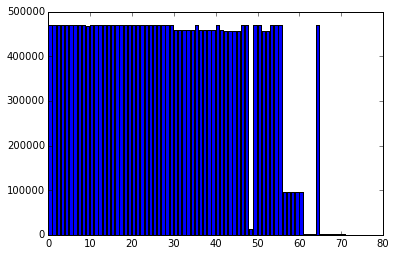

In [10]:
locx = range(len(goodColumnCount))
plt.bar(locx, goodColumnCount)
plt.show

In [11]:
# Aplicamos al dataframe. Nos quedamos con las columnas buenas.
# goodColumunCount es una serie donde indice es el nombre de las cols.
df = df[goodColumnCount.index]

In [12]:
df.sample(4)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime
166977,2015,1,1,13,2,2015-01-13,WN,19393,WN,N8635F,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
84739,2015,1,1,6,2,2015-01-06,DL,19790,DL,N344NW,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
132954,2015,1,1,2,5,2015-01-02,WN,19393,WN,N7812G,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
153207,2015,1,1,6,2,2015-01-06,WN,19393,WN,N436WN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Vemos las cols que tienen Origin
df.columns[df.columns.str.contains('Origin')]

Index([u'OriginAirportID', u'OriginAirportSeqID', u'OriginCityMarketID',
       u'Origin', u'OriginCityName', u'OriginState', u'OriginStateFips',
       u'OriginStateName', u'OriginWac'],
      dtype='object')

In [14]:
# Con lo anterior se puede ver si hay info redundante.
# Lo mismo para delay
df.columns[df.columns.str.contains('Delay')]

Index([u'DepDelay', u'DepDelayMinutes', u'DepartureDelayGroups', u'ArrDelay',
       u'ArrDelayMinutes', u'ArrivalDelayGroups', u'CarrierDelay',
       u'WeatherDelay', u'NASDelay', u'SecurityDelay', u'LateAircraftDelay'],
      dtype='object')

In [15]:
# Lo mismo para destination
# Devuelve un tipo índice, no es una serie, es parecido, pero no lo mismo.

df.columns[df.columns.str.contains('Dest')]

Index([u'DestAirportID', u'DestAirportSeqID', u'DestCityMarketID', u'Dest',
       u'DestCityName', u'DestState', u'DestStateFips', u'DestStateName',
       u'DestWac'],
      dtype='object')

In [16]:
# En Pandas con or combina los tipo índice.
i1 = pd.Index([0,1,2])
i2 = pd.Index([1,2,3])

In [17]:
i1 | i2

Int64Index([0, 1, 2, 3], dtype='int64')

In [18]:
# Haciendo un xor
i1 ^ i2

Int64Index([0, 3], dtype='int64')

In [19]:
origincolumn = df.columns[df.columns.str.contains('Origin')]
destcolumn = df.columns[df.columns.str.contains('Dest')]

In [20]:
# La salida es ordenada alfabéticamente.
origincolumn | destcolumn

Index([u'Dest', u'DestAirportID', u'DestAirportSeqID', u'DestCityMarketID',
       u'DestCityName', u'DestState', u'DestStateFips', u'DestStateName',
       u'DestWac', u'Origin', u'OriginAirportID', u'OriginAirportSeqID',
       u'OriginCityMarketID', u'OriginCityName', u'OriginState',
       u'OriginStateFips', u'OriginStateName', u'OriginWac'],
      dtype='object')

In [21]:
# Eliminación de columnas con drop
# Eliminamos las columnas que tienen Div
divcolumns = df.columns[df.columns.str.contains('Div')]
# Importante axis = 1!!
df = df.drop(divcolumns,axis = 1)

In [22]:
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
168185,2015,1,1,12,1,2015-01-12,WN,19393,WN,N637SW,...,1142,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30351,2015,1,1,13,2,2015-01-13,AA,19805,AA,N520AA,...,224,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106665,2015,1,1,1,4,2015-01-01,DL,19790,DL,N6712B,...,290,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466557,2015,1,1,12,1,2015-01-12,MQ,20398,MQ,N688MQ,...,402,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90967,2015,1,1,8,4,2015-01-08,DL,19790,DL,N825DN,...,1979,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Funcion para pasar NaN en un 0 o lo que queramos.
df.fillna(0)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2015,1,1,1,4,2015-01-01,AA,19805,AA,N787AA,...,2475,10,0,0,0,0,0,0,0,0
1,2015,1,1,2,5,2015-01-02,AA,19805,AA,N795AA,...,2475,10,0,0,0,0,0,0,0,0
2,2015,1,1,3,6,2015-01-03,AA,19805,AA,N788AA,...,2475,10,0,0,0,0,0,0,0,0
3,2015,1,1,4,7,2015-01-04,AA,19805,AA,N791AA,...,2475,10,0,0,0,0,0,0,0,0
4,2015,1,1,5,1,2015-01-05,AA,19805,AA,N783AA,...,2475,10,0,0,0,0,0,0,0,0
5,2015,1,1,6,2,2015-01-06,AA,19805,AA,N799AA,...,2475,10,0,0,25,0,0,0,0,0
6,2015,1,1,7,3,2015-01-07,AA,19805,AA,N784AA,...,2475,10,0,0,0,0,0,0,0,0
7,2015,1,1,8,4,2015-01-08,AA,19805,AA,N787AA,...,2475,10,0,0,0,0,0,0,0,0
8,2015,1,1,9,5,2015-01-09,AA,19805,AA,N795AA,...,2475,10,0,0,0,0,0,0,0,0
9,2015,1,1,10,6,2015-01-10,AA,19805,AA,N790AA,...,2475,10,0,0,0,0,0,0,0,0


In [24]:
# Otra forma de cambiar un valor.

def replace(integer):
    if integer == 7:
        return np.NAN
    else:
        return integer

df['DayOfWeek'].apply(replace)

0          4
1          5
2          6
3        NaN
4          1
5          2
6          3
7          4
8          5
9          6
10       NaN
11         1
12         2
13         3
14         4
15         5
16         6
17       NaN
18         1
19         2
20         3
21         4
22         5
23         6
24       NaN
25         1
26         2
27         3
28         4
29         5
          ..
469938     6
469939   NaN
469940     1
469941     2
469942     3
469943     4
469944     5
469945     6
469946   NaN
469947     1
469948     2
469949     3
469950     4
469951     5
469952     6
469953   NaN
469954     1
469955     2
469956     3
469957     4
469958     5
469959     6
469960   NaN
469961     1
469962     2
469963     3
469964     4
469965     5
469966     6
469967     4
Name: DayOfWeek, dtype: float64

In [25]:
# Añadiéndolo a una columna nueva

df['NewDay'] = df['DayOfWeek'].apply(replace)

In [26]:
# Seleccionamos un elemento de un dataframe.

df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,NewDay
288928,2015,1,1,4,7,2015-01-04,OO,20304,OO,N629BR,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188280,2015,1,1,19,1,2015-01-19,WN,19393,WN,N7708E,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
186516,2015,1,1,17,6,2015-01-17,WN,19393,WN,N716SW,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
371392,2015,1,1,23,5,2015-01-23,DL,19790,DL,N340NW,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
217679,2015,1,1,8,4,2015-01-08,WN,19393,WN,N955WN,...,2,4,0,0,0,13,NaN,NaN,NaN,4


In [27]:
# Columna FligthDate

df.FlightDate[317]

'2015-01-08'

## Uso de fechas. Conversión

In [28]:
# Convertir fechas de texto a tipo fecha.
import datetime

In [29]:
t = datetime.datetime.now()
t

datetime.datetime(2015, 12, 19, 12, 57, 27, 274778)

In [30]:
t.hour
t.day
t.minute

57

In [31]:
## Cómo se convierte...

t2 = datetime.datetime.strptime(df['FlightDate'][317],"%Y-%m-%d")

In [32]:
t2

datetime.datetime(2015, 1, 8, 0, 0)

In [33]:
# A cadena de caracteres.

t2.strftime("%m-%d-%Y")

'01-08-2015'

In [34]:
df['FlightDateDt'] = pd.to_datetime(df.FlightDate, format="%Y-%m-%d")

In [35]:
# Conversión a una cadena de caracteres.
# También df.FlightNum = df.FlightNum.map(str)

df.FlightNum = df.FlightNum.astype(str)

In [36]:
df.FlightNum.sample(3)

252315    4662
51228      477
98653       45
Name: FlightNum, dtype: object

# Agrupaciones en DataFrame DF

In [37]:
delayColumns = df.columns[df.columns.str.contains('Delay')]

In [38]:
# Proporción de cada uno de los retrasos.
delayCall = [u'CarrierDelay', u'WeatherDelay',u'NASDelay',u'SecurityDelay',u'LateAircraftDelay']
delayreasonsum = df[delayCall].sum()

In [39]:
delayreasonsum

CarrierDelay         1708155
WeatherDelay          263087
NASDelay             1278055
SecurityDelay           6700
LateAircraftDelay    2183865
dtype: float64

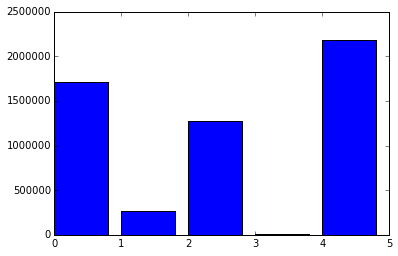

In [40]:
locx = range(len(delayreasonsum))
plt.bar(locx,delayreasonsum)
#plt.xticks(locx, delayreasonsum.index, rotation= 45)

plt.show()

In [41]:
locx
delayreasonsum

CarrierDelay         1708155
WeatherDelay          263087
NASDelay             1278055
SecurityDelay           6700
LateAircraftDelay    2183865
dtype: float64

<function matplotlib.pyplot.show>

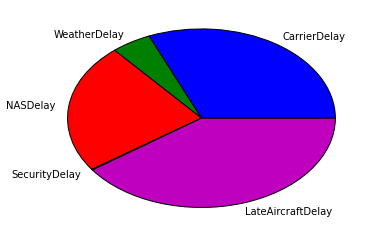

In [42]:
plt.pie(delayreasonsum, labels=delayreasonsum.index)
plt.show

<function matplotlib.pyplot.show>

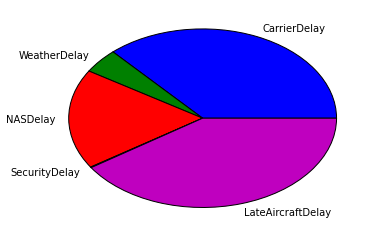

In [43]:
# Gráfico de tartas en una Aerolíneas
dfAA = df[df["Carrier"]=='AA']
delayreasonsumAA = dfAA[delayCall].sum()
plt.pie(delayreasonsumAA, labels=delayreasonsumAA.index)
plt.show

In [44]:
range(len(delayreasonsum))


[0, 1, 2, 3, 4]

In [45]:
by_carrier = df.groupby('Carrier')

In [46]:
delayCall = [u'CarrierDelay', u'WeatherDelay',u'NASDelay',u'SecurityDelay',u'LateAircraftDelay']
by_carrier[delayCall]

In [47]:
delaySumCarriers = by_carrier[delayCall].sum()

<function matplotlib.pyplot.show>

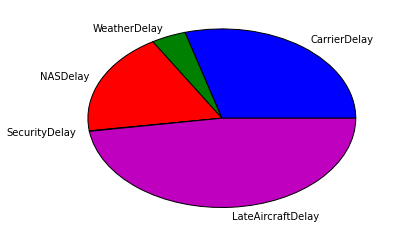

In [48]:
plt.pie(delaySumCarriers.ix['OO'], labels = delaySumCarriers.columns)
plt.show

In [49]:
delaySumCarriersAA2 = delaySumCarriers.ix['AA']

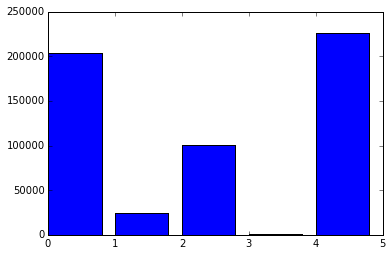

In [50]:
locx = range(len(delaySumCarriersAA2))
plt.bar(locx, delaySumCarriersAA2)
plt.show()

In [53]:
by_carrier.DepDelay.sum()

Carrier
AA    457355
AS     41946
B6    206040
DL    376407
EV    470725
F9    121305
HA      8408
MQ    444967
NK    113676
OO    570636
UA    524744
US    169183
VX     32142
WN    935339
Name: DepDelay, dtype: float64

In [54]:
delaysum = by_carrier.DepDelay.sum()

In [58]:
delaysum.sort(ascending=False)

In [59]:
delaysum

Carrier
WN    935339
OO    570636
UA    524744
EV    470725
AA    457355
MQ    444967
DL    376407
B6    206040
US    169183
F9    121305
NK    113676
AS     41946
VX     32142
HA      8408
Name: DepDelay, dtype: float64

In [60]:
# top 5
delaysum.head(5)

Carrier
WN    935339
OO    570636
UA    524744
EV    470725
AA    457355
Name: DepDelay, dtype: float64

In [62]:
# Aeropuertos con mayores retrasos.

by_airport = df.groupby('Origin')['WeatherDelay'].sum()

In [64]:
by_airport.sort(ascending= False)

In [71]:
by_airport2 = by_airport.head(10)

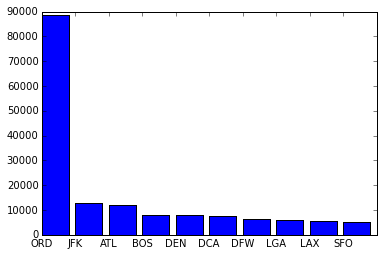

In [72]:
locx = range(len(by_airport2))
plt.bar(locx, by_airport2)
plt.xticks(locx, by_airport2.index)
plt.show()

In [77]:
# Aeropuertos con mayores retrasos.

by_airport3 = df.groupby('Origin')['WeatherDelay'].agg(['mean', 'count'])

In [83]:
by_airport3 = by_airport3[by_airport3['count']>1000]
by_airport3 = by_airport3.sort('mean', ascending=False).head(5)

In [86]:
by_airport3

,mean,count
Origin,,
ORD,12.134054,7303
DCA,6.728964,1129
JFK,6.598433,1915
BOS,4.194430,1939
SLC,3.363402,1164


## Evolución de vuelos para cada uno de los días.

In [91]:
df['FlightDate2']= pd.to_datetime(df.FlightDate,format="%Y-%m-%d")

In [92]:
by_flightDate = df.groupby('FlightDate2')

In [96]:
# con elegir una columna basta pasa el conteo.

flightEvo = by_flightDate.Year.count()

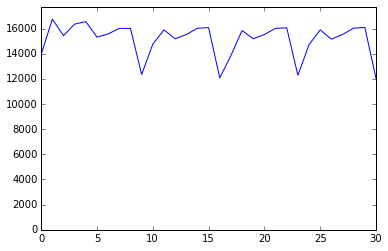

In [102]:
# Lo sacaría ordenado, pero por si acaso, usamos antes un sort.

flightEvo = flightEvo.sort_index()

plt.plot(flightEvo)
plt.ylim(0,flightEvo.max()+1000)
# El mas 1000 es para que no quede pegado arriba.

plt.show()

In [110]:
# Crear un dataframe con 3 columnas: Flight, Distance, Duration.
simpledftime = df[['FlightNum', 'Distance', 'AirTime']]

In [111]:
simpledftime.corr()

,Distance,AirTime
Distance,1.000000,0.981376
AirTime,0.981376,1.000000


In [113]:
# Extraer la hora

df.DepTime

0          855
1          850
2          853
3          853
4          853
5          856
6          859
7          856
8          901
9          903
10         854
11         853
12         854
13         856
14         852
15         900
16         852
17         916
18         854
19         853
20         853
21         852
22         854
23        1043
24         903
25         854
26         NaN
27         NaN
28         855
29         858
          ... 
469938     557
469939     554
469940     550
469941     558
469942     559
469943     553
469944     553
469945     550
469946     552
469947     554
469948     603
469949     554
469950     557
469951     552
469952     555
469953     551
469954     550
469955     554
469956     556
469957     555
469958     555
469959     552
469960     554
469961     551
469962     549
469963     603
469964     556
469965     556
469966     601
469967     743
Name: DepTime, dtype: float64

In [119]:
def extractHour(n):
    return int(n/100)

In [121]:
df['Hour']=df['DepTime'].fillna(0).apply(extractHour)

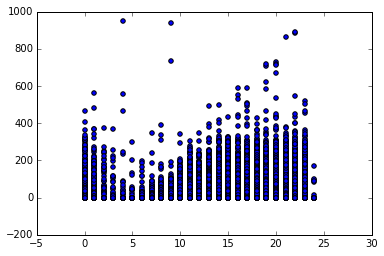

In [128]:
plt.scatter(df['Hour'], df['LateAircraftDelay'])
plt.show()

In [129]:
# Lo pintamos con otro más claro.

by_hour = df.groupby('Hour')

In [134]:
hours = []
groups = []
for h, g in by_hour:
    hours.append(h)
    groups.append(g['LateAircraftDelay'].dropna())

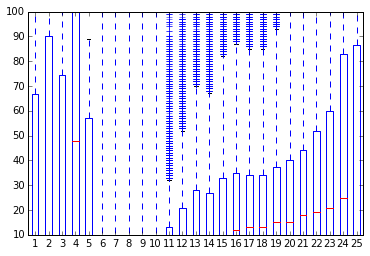

In [137]:
plt.boxplot(groups)
plt.ylim(10,100)
plt.show()
# Lectura: dentro de la caja está el 50% (del 25% al 75%) de los valores, el rojo es la media y los puntos son outlayers